In [2]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Import dataset

auction = pd.read_csv("iplauction2023.csv")

In [5]:
#Let us examine the heding and first few rows of the dataset
auction.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


In [6]:
auction.shape

(309, 7)

In [7]:
auction.columns

Index(['name', 'player style', 'nationality', 'base price (in lacs)',
       'final price (in lacs)', 'franchise', 'status'],
      dtype='object')

In [8]:
auction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   309 non-null    object 
 1   player style           309 non-null    object 
 2   nationality            309 non-null    object 
 3   base price (in lacs)   151 non-null    float64
 4   final price (in lacs)  238 non-null    float64
 5   franchise              238 non-null    object 
 6   status                 309 non-null    object 
dtypes: float64(2), object(5)
memory usage: 17.0+ KB


In [9]:
auction.describe()

,base price (in lacs),final price (in lacs)
count,151.000000,238.000000
mean,59.205298,368.067227
std,59.688337,449.070117
min,20.000000,20.000000
25%,20.000000,21.250000
50%,20.000000,150.000000
75%,75.000000,625.000000
max,200.000000,1850.000000


In [10]:
# Data Cleaning
auction.isna().any()

name                     False
player style             False
nationality              False
base price (in lacs)      True
final price (in lacs)     True
franchise                 True
status                   False
dtype: bool

In [11]:
#Replace NAN values of prices with 0:
auction["final price (in lacs)"] = auction["final price (in lacs)"].fillna(0)
auction["base price (in lacs)"] = auction["base price (in lacs)"].fillna(0)
auction

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,0.0,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,0.0,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,0.0,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD
...,...,...,...,...,...,...,...
304,MS Dhoni,WK-Batter,India,0.0,1200.0,CSK,RETAINED
305,Moeen Ali,Allrounder,England,0.0,800.0,CSK,RETAINED
306,Ruturaj Gaikwad,Batter,India,0.0,600.0,CSK,RETAINED
307,Rishabh Pant,WK-Batter,India,0.0,1600.0,DC,RETAINED


In [12]:
#NAN in franchise means the player is not sold, let's Change nan to unsold, so that we can visulize the difference
auction["franchise"] = auction["franchise"].fillna("unsold")

In [13]:
#To verify that cleanindg is done 
auction.isna().any()

name                     False
player style             False
nationality              False
base price (in lacs)     False
final price (in lacs)    False
franchise                False
status                   False
dtype: bool

EXPLOREING AND VISULIZATION OF DATA

In [14]:
auction["player style"].value_counts()

player style
Bowler        111
Allrounder    103
Batter         55
WK-Batter      40
Name: count, dtype: int64

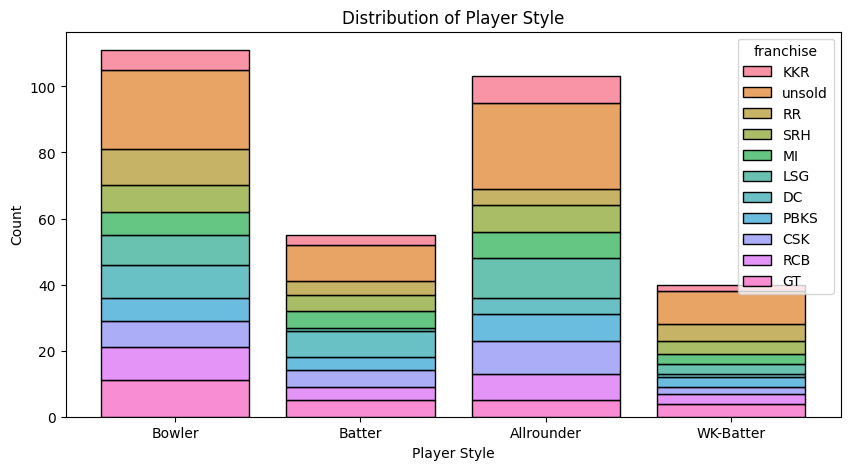

In [15]:
plt.figure(figsize = (10,5))
sns.histplot(auction, x = "player style", hue = "franchise", multiple = "stack", shrink = 0.8)
plt.title("Distribution of Player Style")
plt.xlabel("Player Style")
plt.show()

In [16]:
auction["nationality"].value_counts()

nationality
India           201
England          24
South Africa     19
West Indies      14
Australia        14
New Zealand      11
Sri Lanka         8
Afghanistan       7
Bangladesh        4
Ireland           2
Zimbabwe          2
Namibia           1
Netherlands       1
Singapore         1
Name: count, dtype: int64

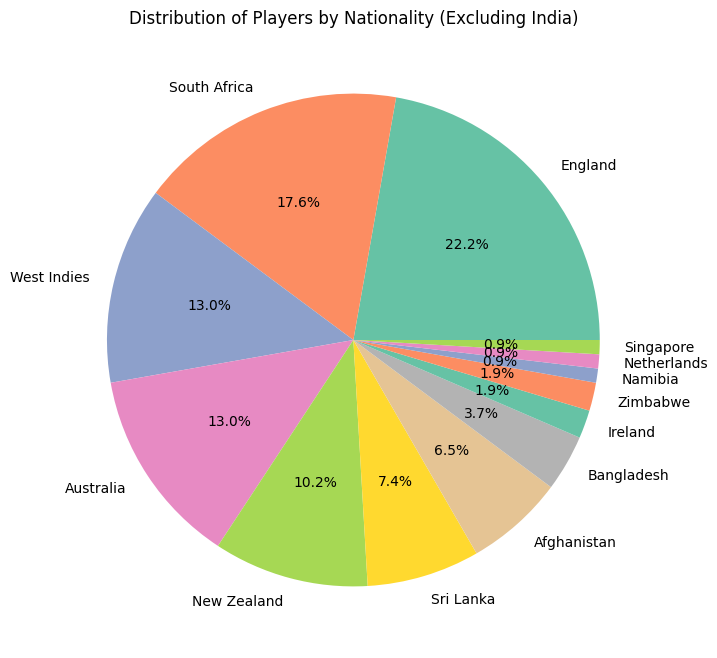

In [19]:
# Count the player by nationality
nationality_count = auction["nationality"].value_counts()

# Exclude india from the data 
if "India" in nationality_count:
    nationality_count = nationality_count.drop("India")

#normalize the count to represent the rest as 100%
nationality_counts_normalized = nationality_count/nationality_count.sum()*100

#plot the pie chart
plt.figure(figsize=(8,8))
plt.pie(nationality_counts_normalized, labels=nationality_counts_normalized.index, autopct='%1.1f%%', colors = sns.color_palette("Set2"))
plt.title('Distribution of Players by Nationality (Excluding India)')
plt.show()

SOLD, UNSOLD AND RETAINED

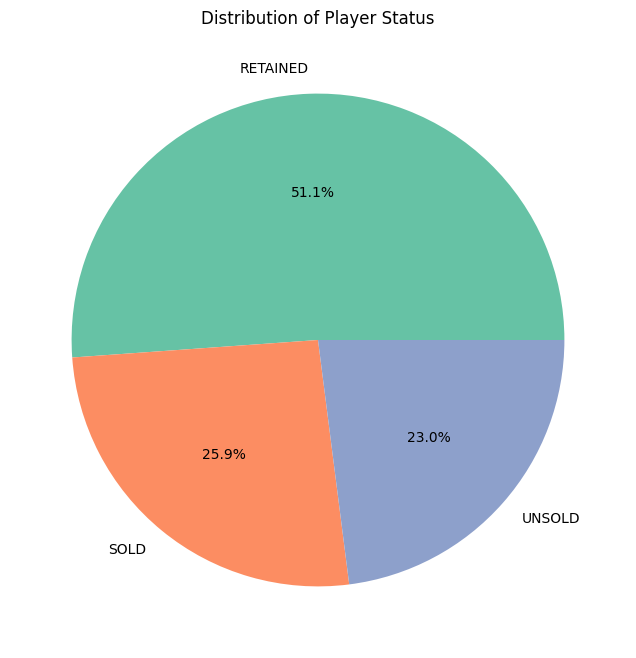

In [24]:
status_count = auction["status"].value_counts()

#plot the pie chart
plt.figure(figsize=(8,8))
plt.pie(status_count, labels=status_count.index, autopct='%1.1f%%', colors = sns.color_palette("Set2"))
plt.title("Distribution of Player Status")
plt.show()


Top Performance With Higgest Bid

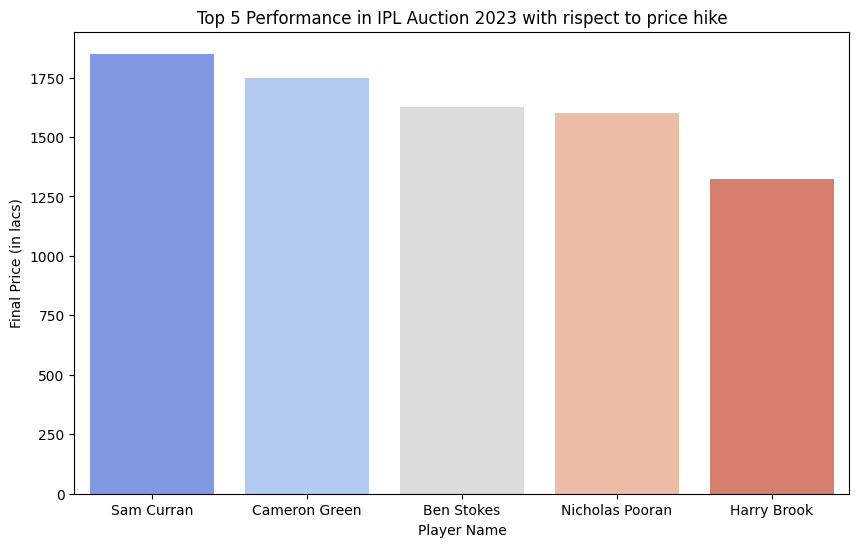

In [27]:
sold_player = auction[auction["status"] == "SOLD"]

#sort by the ratio for batter visualization
top_5_performance = sold_player.sort_values(by="final price (in lacs)", ascending = False).head(5)
plt.figure(figsize = (10,6))
sns.barplot(x="name", y="final price (in lacs)", hue = "name", data = top_5_performance, palette = "coolwarm", legend=False)
plt.title("Top 5 Performance in IPL Auction 2023 with rispect to price hike")
plt.xlabel("Player Name")
plt.ylabel("Final Price (in lacs)")
plt.show()

The Top Performance (Who Exceeded Expectation)

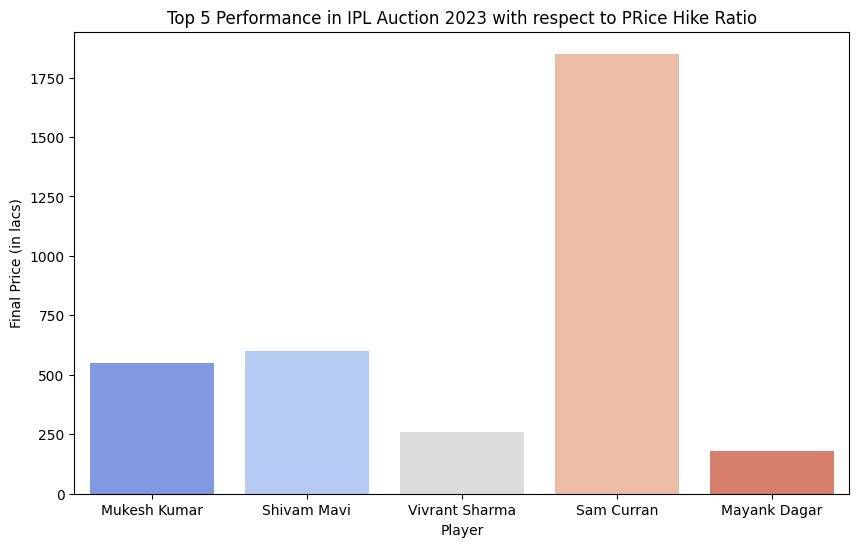

In [33]:
# calculate the ratio of actual price to base price
auction["Price Ratio"] = auction["final price (in lacs)"]/auction["base price (in lacs)"]

sold_player = auction[auction["status"] == "SOLD"]
# sort by the ratio for the batter visulization
top_5_performance = sold_player.sort_values(by = "Price Ratio", ascending=False).head(5)

#ploting the data using seaborn

plt.figure(figsize = (10,6))
sns.barplot(x="name", y="final price (in lacs)", data = top_5_performance, hue="name", palette = "coolwarm")
plt.title("Top 5 Performance in IPL Auction 2023 with respect to PRice Hike Ratio")
plt.xlabel("Player")
plt.ylabel("Final Price (in lacs)")
plt.show()

In [34]:
auction.head(5)

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status,Price Ratio
0,Harshit Rana,Bowler,India,0.0,20.0,KKR,RETAINED,inf
1,Ekant Sen,Batter,India,20.0,0.0,unsold,UNSOLD,0.0
2,Wayne Parnell,Allrounder,South Africa,75.0,0.0,unsold,UNSOLD,0.0
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD,1.0
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD,1.0


Highest Paid Retained Player

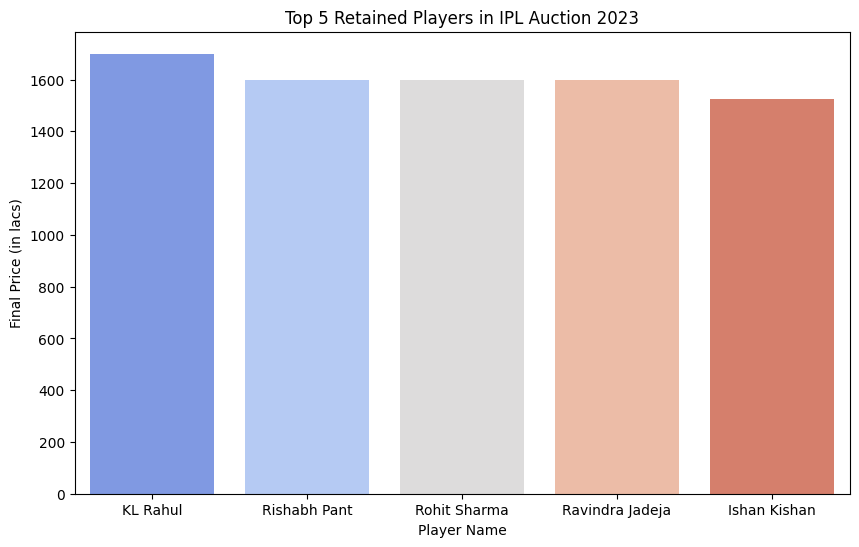

In [36]:
retained_players = auction[auction["status"] == "RETAINED"]

#Sort by the the ratio for the batter visulization 
top_5_retained = retained_players.sort_values(by = "final price (in lacs)", ascending = False).head(5)
plt.figure(figsize=(10,6))
sns.barplot(x = "name", y = "final price (in lacs)", data = top_5_retained, hue = "name", palette = "coolwarm")
plt.title("Top 5 Retained Players in IPL Auction 2023")
plt.xlabel("Player Name")
plt.ylabel("Final Price (in lacs)")
plt.show()

Unsold palyer with High Base price

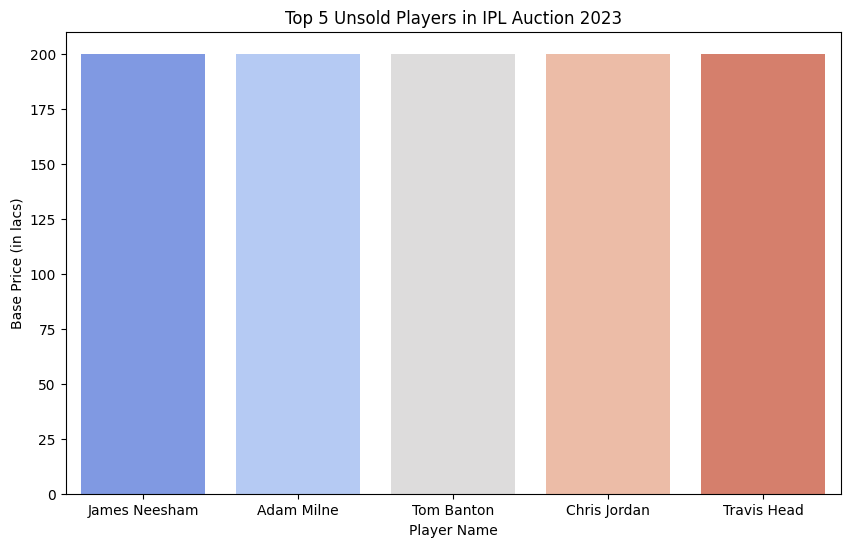

In [39]:
unsold_player = auction[auction["status"] == "UNSOLD"] 

#sort by the ratio for the batter visulization
top_5_unsold = unsold_player.sort_values(by = "base price (in lacs)", ascending = False).head(5)
plt.figure(figsize = (10,6))
sns.barplot(x = "name", y = "base price (in lacs)", data = top_5_unsold, hue = "name", palette = "coolwarm")
plt.title("Top 5 Unsold Players in IPL Auction 2023")
plt.xlabel("Player Name")
plt.ylabel("Base Price (in lacs)")
plt.show()


Franchise Wise Exploration

Example (RCB)

Player Style

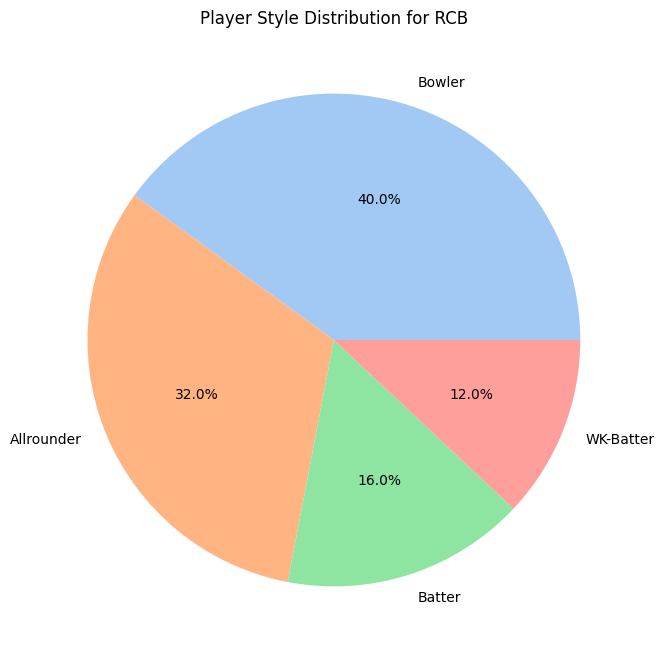

In [40]:
# Filter data for the franchise "RCB"
rcb_data = auction[auction["franchise"] == "RCB"]

# Count the occurrance of each player style
style_count = rcb_data["player style"].value_counts()

#plot the pie chart
plt.figure(figsize = (8,8))
plt.pie(style_count, labels = style_count.index, autopct = "%1.1f%%", colors = sns.color_palette("pastel"))
plt.title("Player Style Distribution for RCB")
plt.show()

NATIONALITIES

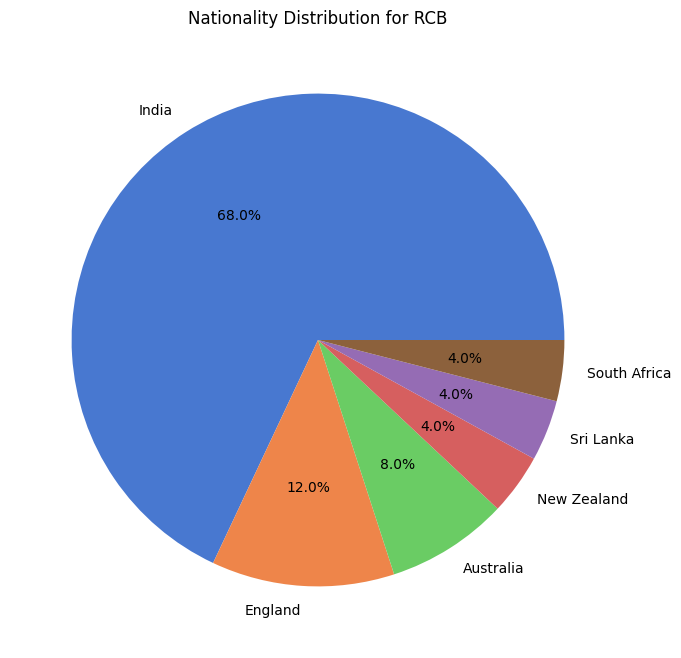

In [42]:
#COUNT THE OCCURRENCES OF EACH PLAYER STYLE
nationality_counts = rcb_data["nationality"].value_counts()

# plot the pie chart
plt.figure(figsize = (8,8))
plt.pie(nationality_counts, labels=nationality_counts.index, autopct = "%1.1f%%", colors = sns.color_palette("muted"))
plt.title("Nationality Distribution for RCB")
plt.show()

FINAL PRICE DISTRIBUTION FOR RCB

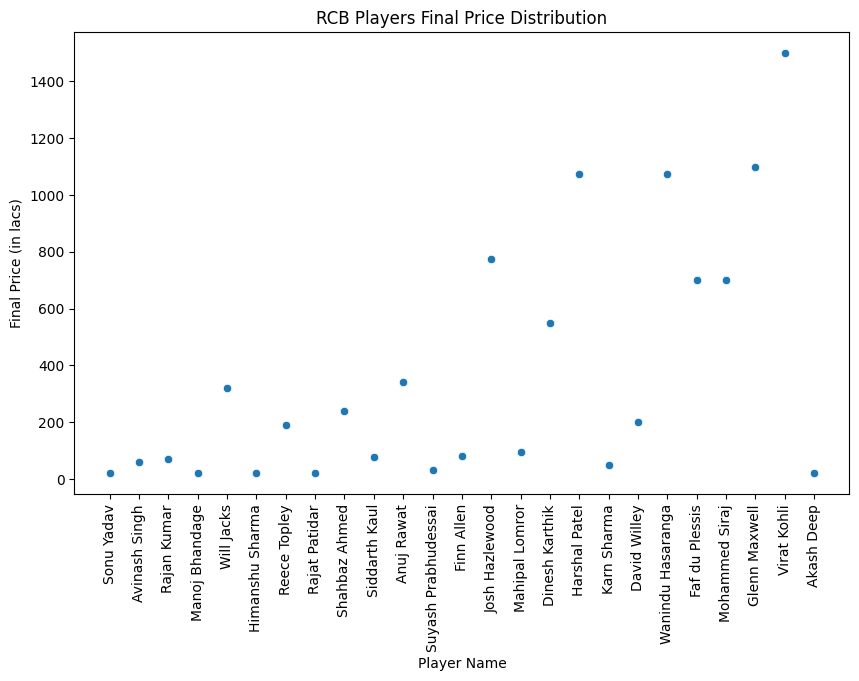

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="name", y = "final price (in lacs)", data = rcb_data)
plt.title("RCB Players Final Price Distribution")
plt.xlabel("Player Name")
plt.ylabel("Final Price (in lacs)")
plt.xticks(rotation=90) 
plt.show()